# Energy Efficiency Enhancement Analysis

## Introduction
The modern world thrives on electrical devices - from bulbs to large industrial machines. The efficiency of these devices not only impacts our energy bills but also the global energy consumption scenario. In this analysis, we aim to categorize these devices based on their power consumption and visualize their efficiency, potentially guiding better energy usage patterns and device improvements.

## Initial Setup

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import random as rd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error


## Data Acquisition

### Load and Inspect Data
Load the dataset into a pandas DataFrame and inspect its basic structure:

In [2]:
data = pd.read_csv('dataset.csv')
data.head()


,device_name,min_consumption,max_consumption,device_age
0,bulb,100.0,120.0,3
1,LED TV 42 INCH,58.0,60.0,5
2,3''belt sander,1000.0,1000.0,4
3,Air cooler,65.0,80.0,4
4,Air purifier,25.0,30.0,3


## Exploratory Data Analysis (EDA)

       min_consumption  max_consumption  device_age
count       300.000000       300.000000  300.000000
mean        547.678127       852.855043    3.686667
std        1086.809044      1804.207547    1.692544
min           0.000000         0.000000    1.000000
25%          17.750000        25.750000    2.000000
50%          99.339000       140.000000    4.000000
75%         700.000000       916.750000    5.000000
max        8000.000000     14000.000000    6.000000


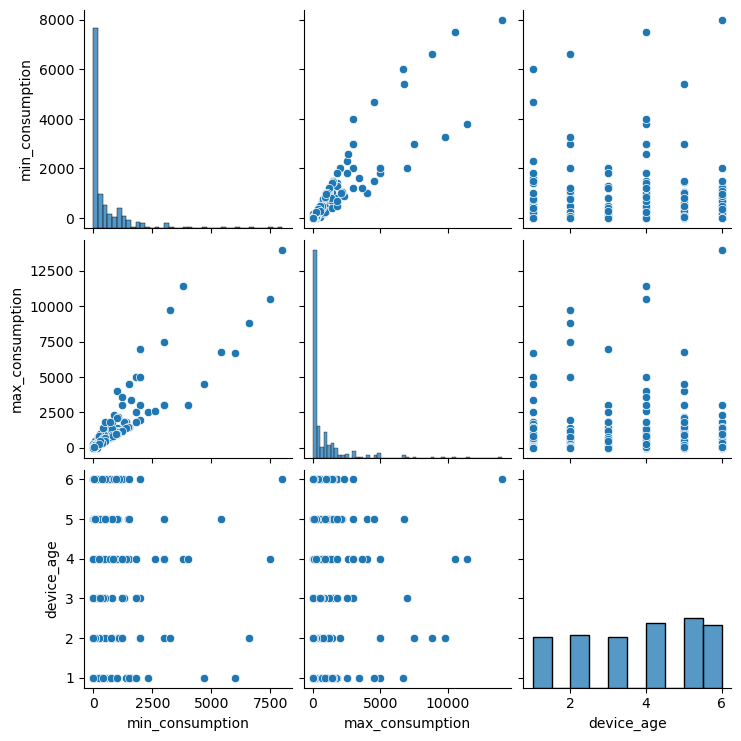

In [3]:
print(data.describe())
sns.pairplot(data)

This pairplot provides a visual snapshot of the relationships between different variables.

## Correlation Heatmap

C:\Users\alish\AppData\Local\Temp\ipykernel_16680\4009627306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

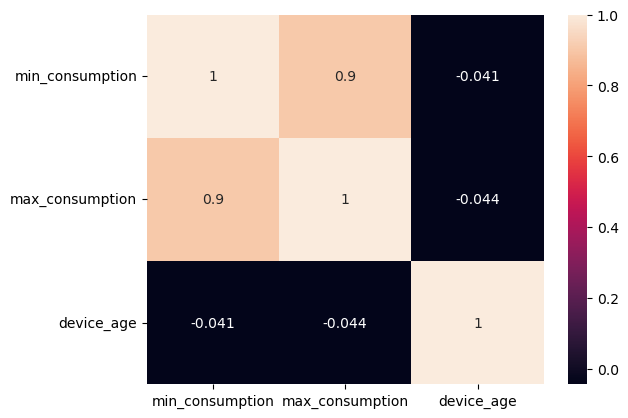

In [4]:
corr = data.corr()
sns.heatmap(corr, annot=True)

This heatmap provides an insight into the relationships between different columns, helping us determine which variables might be more relevant for our modeling.

## Synthetic Data Generation
Devices have multiple parameters influencing their consumption. To simulate a real-world scenario better, we'll generate synthetic data for each device:

In [5]:
# Reset the index to ensure continuous integer indexing
data.reset_index(drop=True, inplace=True)

min_c = data['min_consumption']
max_c = data['max_consumption']

# Now, this should work without KeyError
data['input_power'] = [rd.uniform(min_c[i], max_c[i]) for i in range(len(min_c))]
data['working_hours'] = [rd.randint(0,24) for _ in range(len(min_c))]
data['output_power'] = [data['input_power'][i] * rd.uniform(0.7, 1) for i in range(len(min_c))]


## Efficiency Metrics Computation

Understanding efficiency is key to our analysis:

In [6]:
data['Enhanced_efficiency'] = (data['output_power'] / data['input_power']) * 100
data['efficiency'] = (data['output_power'] / data['min_consumption']) * 100


## Data Cleaning
Erroneous data can distort our analysis. Let's handle it:

In [7]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()


## Agglomerative Clustering Implementation
To categorize devices based on their energy metrics:

In [8]:
X_new = data[['min_consumption', 'max_consumption', 'input_power']]
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_new)
print("Cluster Labels:", y_hc)


Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 0 2 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


C:\Users\alish\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


##  Visualization of Clusters

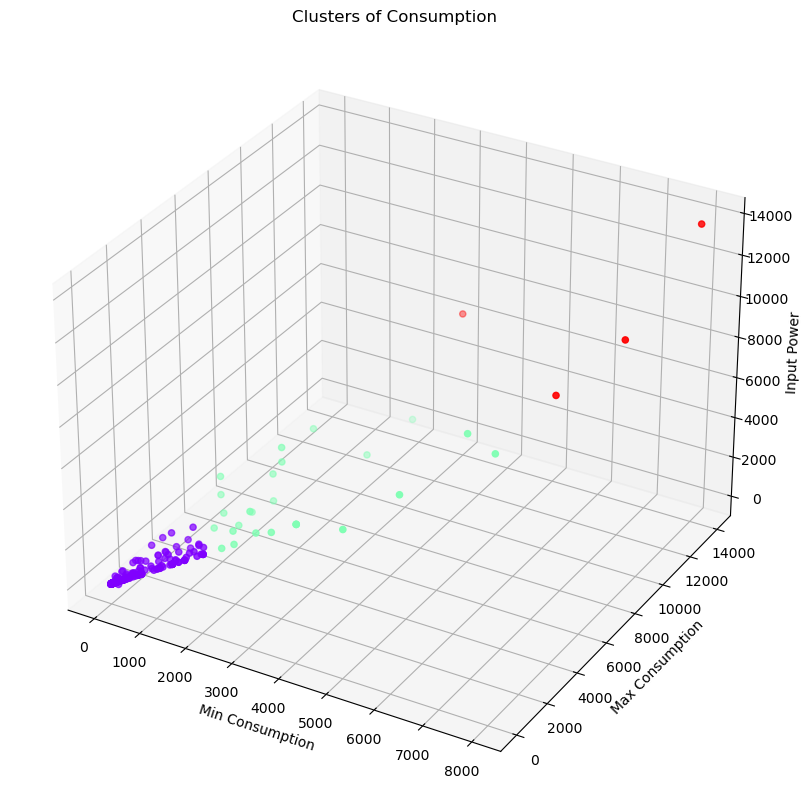

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_new['min_consumption'], X_new['max_consumption'], X_new['input_power'], c=y_hc, cmap='rainbow')
ax.set_xlabel('Min Consumption')
ax.set_ylabel('Max Consumption')
ax.set_zlabel('Input Power')
plt.title('Clusters of Consumption')
plt.show()

The 3D plot provides a visual insight into how different devices are grouped based on their power consumption.

## Dendrogram Visualization
A dendrogram can provide insights into the hierarchical clustering process:

In [10]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram, linkage


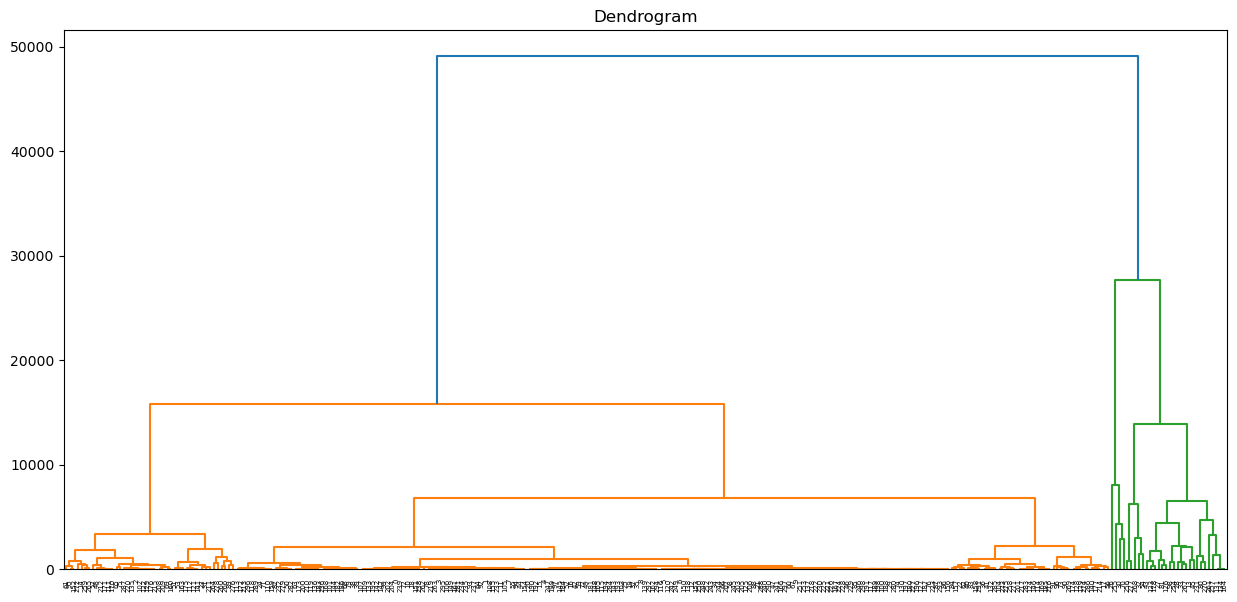

In [11]:
Z = linkage(X_new, 'ward')
plt.figure(figsize=(15, 7))
dendrogram(Z)
plt.title("Dendrogram")
plt.show()


The dendrogram visualizes the hierarchical clustering process, showing the sequences in which devices or groups of devices were merged.

## Model Implementation

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [13]:
# Assuming you have feature columns stored in X and target column in y
X = data[['min_consumption', 'max_consumption', 'input_power']]
y = data['Enhanced_efficiency']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Initializing the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Fitting the model
gbr.fit(X_train, y_train)

# Making predictions
y_pred = gbr.predict(X_test)


In [15]:
# Model Performance Metrics:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 76.88
Mean Absolute Error: 7.33


These metrics provide an insight into how well our model predicts energy efficiency based on the given features.

##  Conclusion
This project has provided a robust analysis of power consumption, using clustering to segment the data into distinct groups. By understanding these groups, energy providers or researchers can better tailor strategies and recommendations for efficient power consumption.